# OilyGiant Project || Machine Learning for Business
---

*Fecha de Creación: Feb-2023*

- **Senior Data Science:** Francisco Alfaro
- **Supported:** Alfonso Tobar
- **Code Reviewer:** Marcos Torres
- **NoteBook by:** Julio César Martínez


# Tabla de Contenido

---

1. Introducción.
2. Licencia.
3. Librerías Requeridas.
4. Problemática.
5. Respuesta de la Problemática.
6. Etapa Uno: Preparación de los Datos.
7. Etapa Dos: Entrena y prueba el modelo para cada región.
8. Etapa Tres: Cálculo de ganancias.
9. Etapa Cuatro: Boostrap.
10. Etapa Cinco: Reporte.
10. Conclusiones.
11. Bibliografía.
12. Agradecimientos.


## || Introducción.

---

El petróleo es, actualmente, la principal fuente de energía, y la materia prima más importante objeto de comercio entre los países. Más de la mitad de la energía que mantiene en actividad a nuestra civilización proviene de esta fuente energética no renovable. Se trata, entonces, de un recurso estratégico cuya carencia provocaría el declive de la economía mundial.

Hay inmensas zonas de origen sedimentario en las que se supone que pueden haber grandes yacimientos todavía por explotar como, por ejemplo, en el Ártico, Alaska, Canadá, Groenlandia o Siberia. Se ha calculado que las reservas totales de petróleo en el planeta suman unos 150.000 millones de Tep (Tonelada equivalente de petróleo), una quinta parte de las que –unas 100 Gt– son actualmente rentables para las técnicas modernas de extracción.

Después de un aislamiento subterráneo de millones de años, al ser extraído, inicia un largo viaje que lo llevará a miles de kilómetros de distancia de su lugar de origen, y a diversos lugares del mundo. Barcos superpetroleros y extensas tuberías de transporte lo ponen al alcance de los grandes centros de consumo, donde será tratado para extraer sus valiosos componentes e incorporarlo a la cadena productiva humana.

Este esto último es el caso del proyecto que realizaremos en este notebook.

## || Licencia.
---

Este notebook fue creado para la practica profesional de habilidades en ciencia de adtos y es propiedad de su creador. Queda prohibida su venta, copia, distribución, modificación y/o cualquier uso indevido e ilegial de este así como la base de datos (dataset) proporcionada por OilyGiant. Si existe alguna duda o aclaración con respecto a este ejercicio puedes ponerte en contacto con el creador para dar solución.

## || Librerías Requeridas.

---

Para este proyecto en este nootebook utilizamos diferentes librerías de python como son:

- Pandas.
- NumPy.
- Scikit-Learn.
- Matplotlib.
- Seaborn.

## || Problemática.

---

La compañía minera **OilyGiant** desea invertir en un nuevo yacimiento de petreoleo pero no está segura de hacerlo sin antes calcular el riesgo que conlleva esta inversión al ubicar el nuevo pozo.

OilyGiant nos ha proporcionado datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Debemos crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analizaré los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

Condiciones:

- Solo la regresión lineal es adecuada para el entrenamiento de modelos (el resto no son lo suficientemente predecibles).
- Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
- El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
- Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).
- Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.
- Los datos son sintéticos: los detalles del contrato y las características del pozo no se publican.

## || Respuesta.

---

Vamos ayudar en las tareas de ubicación para encontrar el mejor lugar donde ubicar este nuevo pozo. Para ello realizaremos el siguiente proceso:

Pasos para elegir la ubicación:

- Recolectar los parámetros del pozo de petróleo en la región seleccionada: calidad del petróleo y volumen de reservas;
- Construiré un modelo para predecir el volumen de reservas en los nuevos pozos;
- Seleccionaré los pozos de petróleo con los valores estimados más altos;
- Finalmente escogeré la región con el mayor beneficio total para los pozos de petróleo seleccionados.

En la tabla de contenidos puedes ver el proceso paso a paso de cómo resolví este proyecto.

## || Etapa Uno - Preparación de Datos.
---

Importar Librerías.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Importar Datasets

In [2]:
data_1 = pd.read_csv('/datasets/geo_data_0.csv')
data_2 = pd.read_csv('/datasets/geo_data_1.csv')
data_3 = pd.read_csv('/datasets/geo_data_2.csv')

Tamaño de los Datasets.

In [3]:
print('Tamaño del 1er Dataset:', data_1.shape)
print('Tamaño del 2do Dataset:', data_2.shape)
print('Tamaño del 3er Dataset:', data_3.shape)

Tamaño del 1er Dataset: (100000, 5)
Tamaño del 2do Dataset: (100000, 5)
Tamaño del 3er Dataset: (100000, 5)


Tipo de Datos.

In [4]:
print('Dataset 1:', data_1.dtypes)
print('\n')
print('Dataset 2:', data_2.dtypes)
print('\n')
print('Dataset 3:', data_3.dtypes)

Dataset 1: id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object


Dataset 2: id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object


Dataset 3: id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object


Información General.

In [5]:
print('Dataset 1:', data_1.info())
print('\n')
print('Dataset 2:', data_2.info())
print('\n')
print('Dataset 3:', data_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Dataset 1: None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Dataset 2: None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total

Visualizamos los sets.

In [6]:
data_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [7]:
data_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [8]:
data_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


**Descripción de los Datos**

- `id` — identificador único de pozo de petróleo
- `f0, f1, f2` — tres características de los puntos (su significado específico no es importante, pero las características en sí son significativas)
- `product` — volumen de reservas en el pozo de petróleo (miles de barriles).

**Observaciones**

> Todo parece estar en orden. No hay evidencias de valores ausentes o tipo de dato incorrecto.

## || Etapa Dos - Entrenar y Probar Modelo para Cada Región.

---

Descripción del flujo de trabajo para esta sección:

- Dividir los datos en un conjunto de entrenamiento y un conjunto de validación en una proporción de 75:25.
- Entrenar el modelo y hacer predicciones para el conjunto de validación.
- Guardar las predicciones y las respuestas correctas para el conjunto de validación.
- Mostrar el volumen promedio de las reservas previstas y la RECM del modelo.
- Analizar los resultados.

### Desarrollo de Función.

Debido a que el proceso es iteratibo vamos a desarrollar una función que nos ayude a entrenar nuestro modelo para las 3 regiones.

In [9]:
## Declaramos el valor aleatorio.
random = np.random.RandomState(12345)

## Creamos la función.
def train(data, random_state=random):
    
    ## Definimos target y features.
    features = data.drop(['product', 'id'], axis=1)
    target = data['product']
    
    ## Hacemos split de datos.
    X_train, X_val, y_train, y_val = train_test_split(
        features, target, random_state=random, test_size=0.25
    )
    ## Entrenamos el modelo.
    linre = LinearRegression()
    linre.fit(X_train, y_train)
    
    ## Obtenemos Predicciones.
    y_pred = linre.predict(X_val)
    
    ## Calculamos la raíz del error cuadrático medio.
    rmse = mean_squared_error(y_val, y_pred, squared= False)
    
    print(f"El volumen promedio de las reservas es: {target.mean()}") ## Mostramos el volumen promedio.
    print(f"El RMSE del modelo es: {rmse}")                           ## Mostramos el RMSE.
    print("--------------------------------------")
    
    ## Guardamos las respuestas y las predicciones.
    table = pd.DataFrame(dict(target = y_val, predictions = y_pred))
    
    return table

Comprobamos que funcione nuestro código.

In [10]:
train(data_1)

El volumen promedio de las reservas es: 92.50000000000001
El RMSE del modelo es: 37.5794217150813
--------------------------------------


,target,predictions
71751,10.038645,95.894952
80493,114.551489,77.572583
2655,132.603635,77.892640
53233,169.072125,90.175134
91141,122.325180,70.510088
...,...,...
12581,170.116726,103.037104
18456,93.632175,85.403255
73035,127.352259,61.509833
63834,99.782700,118.180397


Ahora que podemos ver que funciona, vamos entonces a crear un ciclo 'for' para acceder más rápido a la información.

In [11]:
#Lista con el nombre de las regiones
reg = ["Región 1", "Región 2", "Región 3"]
#Lista con los dataframes.
reg_val = [data_1, data_2, data_3]
#Un diccionario vacío para guardar nuestras predicciones y target.
predictions_dict = {}

#Ciclo que itera sobre las listas.
for region, data in zip(reg, reg_val):
    predictions_dict[region] = train(data)

El volumen promedio de las reservas es: 92.50000000000001
El RMSE del modelo es: 37.91718878682678
--------------------------------------
El volumen promedio de las reservas es: 68.82500000000002
El RMSE del modelo es: 0.8936594805070976
--------------------------------------
El volumen promedio de las reservas es: 95.00000000000004
El RMSE del modelo es: 40.206897848340155
--------------------------------------


De esta manera solo tenemos que consultar nuestro diccionario para acceder a las predicciones.

In [12]:
## Colocamos el nombre de la región a consultar.
predictions_dict["Región 1"]

,target,predictions
70156,58.498891,69.767622
42796,36.790923,75.592468
36723,115.607489,108.927138
79446,87.088342,104.120214
93328,33.397142,100.753785
...,...,...
5864,89.259300,95.399343
69826,159.832931,103.992010
47036,26.575868,110.343875
93329,82.699775,81.257841


**OBSERVACIONES**

- Las evidencias nos muestran que el mejor promedio para las reservas es de la Región 3 con 95 pts pero el RMSE de su modelo es de 40.
- El mejor rmse es de la Región 2 con 0.89 pero su promedio es demasiado bajo con apenas 69 pts.

## || Etapa Tres: Cálculo de Ganancias

---

Teniendo en cuenta lo anterior vamos a calcular el volumen de reservas y algunos datos adicionales.

In [13]:
## < Almacenamos los valores clave >

FONDOS   = 100_000_000 ## Presupuesto.
BARRIL   = 4.5         ## Ingreso x Barril en Dólares.
PRODUCT  = 4_500       ## Ingreso x Unidad de Barril en Dólares/Litro.
n_pozos  = 200         ## Cantidad de Pozos.

## Realizamos Operaciones

pozo   = FONDOS / n_pozos    ## < Calcular costo x pozo >
unit   = PRODUCT / BARRIL    ## < Unidades de barril >
res    = pozo / PRODUCT      ## < Volúmen de Reservas >

print(f'El costo de cada pozo es: {pozo} dls')
print(f'La unidad de barril contiene: {unit} barriles')
print(f'El volúmen de reservas sin pérdidas es: {res} litros')

El costo de cada pozo es: 500000.0 dls
La unidad de barril contiene: 1000.0 barriles
El volúmen de reservas sin pérdidas es: 111.11111111111111 litros


**Hallazgos**
> El volúmen de reservas para no tener perdidas debe ser de 111.11, esta cantidad supera el promedio de cada región obtenido. Recordemos que el promedio se puede ver afectado tanto por los valores positivos como los valores negativos, por lo tanto debemos escoger un criterio para seleccionar la región más adecuada.

## || Etapa Cuatro: Bootstrap
---

En esta parte del proceso vamos a realizar un remuestreo con la finalidad de obtener el cálculo de la ganancia. Para ello vamos a desarrollar otra función.

In [14]:
# < Calculamos Beneficios >

def benef(data, precio = PRODUCT, inversion = FONDOS):
    ## Ordenamos los 200 pozos más importantes para nuestro modelo y los sumamos.
    points = data.sort_values(by='predictions', ascending=False)['target'].head(200).sum()
    
    ## Aplicamos operación para obtener beneficio.
    beneficio = (points*precio) - inversion
    
    return beneficio

¿Cuál es el beneficio de cada una de las 3 regiones?

In [15]:
reg_1 = benef(predictions_dict['Región 1'])
reg_2 = benef(predictions_dict['Región 2'])
reg_3 = benef(predictions_dict['Región 3'])

print(f'El beneficio para la región 1 es: {reg_1}')
print(f'El beneficio para la región 2 es: {reg_2}')
print(f'El beneficio para la región 3 es: {reg_3}')

El beneficio para la región 1 es: 32666888.164499626
El beneficio para la región 2 es: 24150866.966815114
El beneficio para la región 3 es: 23303618.04299873


> Tomando en cuenta las mejores 200 predicciones ahora sabemos que la región 1 es tentativamente la más adecuada.

In [16]:
## < Bootstrap >

def boostrap(data, n_boost = 1000):
    ## Creamos lista vacía para guardar los resultados.
    beneficio_dist = []
    for _ in range(n_boost):
        ## Iteramos sobre el presupuesto para 500 pozos seleccionados.
        puntos_seleccionados = data.sample(n=500, replace=True, random_state=random)
        ## Agregamos los resultados.
        beneficio_dist.append(benef(puntos_seleccionados))

    beneficio_dist = pd.Series(beneficio_dist) ## Convertimos a series de pandas.
    return beneficio_dist

Comprobamos

In [17]:
boostrap(predictions_dict['Región 1'])

0      1.347135e+06
1     -3.440763e+05
2      5.030390e+06
3      1.956741e+06
4      4.311790e+06
           ...     
995    1.158872e+06
996    4.801688e+06
997    8.700722e+06
998    2.540938e+06
999    2.296772e+06
Length: 1000, dtype: float64

## || Etapa Cinco: Reporte.

---

Finalmente vamos a crear un reporte para encontrar el beneficio promedio y el intervalo de confianza que nos permitan seleccionar la región más adecuada para la inversión destinada por OilyGiant.

In [18]:
## <Creamos Reporte>

def reporte(beneficio, region, conf= 0.95):
    ## Definimos punto de significancia.
    alpha = 1 - conf
    
    ## Definimos el intervalo de confianza.
    lower = beneficio.quantile(alpha/2)
    upper = beneficio.quantile(1 - alpha/2)
    
    ## Obtenemos promedio.
    mean = beneficio.mean()
    
    ## Si sumo los casos menores a cero es el conteo de veces que hay perdida
    ## Si lo divido por el No de casos me queda la probabilidad de pérdida...
    loss = (beneficio < 0).mean()

    print(f"Beneficio promedio para la {region} es: {mean}")
    print(f"El intervalo de confianza para {region} es: {(lower, upper)}")
    print(f"Beneficio promedio para la {region} es: {loss*100}%")
    print('-----------------------------------------------------------')

## Creamos un diccionaro nuevo.
beneficio_dict = {}
    
## Iteramos sobre cada región para obtener el reporte de c/u
for region, data in predictions_dict.items():
    beneficio=boostrap(data)
    reporte(beneficio, region = region)
    beneficio_dict[region] = beneficio

Beneficio promedio para la Región 1 es: 3198589.938730471
El intervalo de confianza para Región 1 es: (-1866964.5393971493, 8238302.323207182)
Beneficio promedio para la Región 1 es: 10.9%
-----------------------------------------------------------
Beneficio promedio para la Región 2 es: 4908252.620893162
El intervalo de confianza para Región 2 es: (1151421.2625473996, 9028859.08141665)
Beneficio promedio para la Región 2 es: 0.7000000000000001%
-----------------------------------------------------------
Beneficio promedio para la Región 3 es: 3652850.205933399
El intervalo de confianza para Región 3 es: (-1553587.4713538336, 8900517.515412148)
Beneficio promedio para la Región 3 es: 8.799999999999999%
-----------------------------------------------------------


Graficamos el reporte.

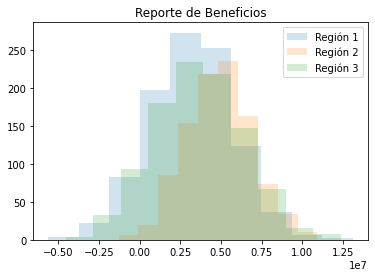

In [19]:
for region, data in beneficio_dict.items():
    plt.hist(data, label=region, alpha=0.2)
plt.title('Reporte de Beneficios')
plt.legend();

## || Conclusiones

---

Después de realizar nuestro análisis podemos ver gracias a las evidencias que el nuevo pozo debe colocarse en la región número 2 debido a que la evaluación de riesgo es menor al 2.5% como lo indica OilyGiant, además fue la región donde el modelo de regresión obtuvo una mejor valoración.

Para este proceso se entrenó un modelo de regresión lineal que posteriormente se evaluó con la técnica RMSE para calcular sus resultados. Calculamos las ganancias y el volumen de reservas suficiente para desarrollar un nuevo pozo sin pérdidas y comparamos el valor obtenido con el volumen medio de reservas de cada región.

Después calculamos la ganancia de un conjunto de pozos de petróleo seleccionados y modelamos las predicciones donde posteriormente escogimos los pozos con los valores más altos de predicciones. Seleccionamos el volumen objetivo de reservas de acuerdo con estas predicciones y sugerimos una región para el desarrollo de pozos petroleros.

Adicional a ello calculamos los riesgos y ganancias para cada región usando la técnica bootstrapping con 1000 muestras para encontrar la distribución del beneficio. Encontramos el beneficio promedio, el intervalo de confianza del 95% y el riesgo de pérdidas.

Deeste modo es como sugerimos una región para el desarrollo de pozos petroleros.
Esperamos que esta información sea de utilidad y de mucho provecho para la empresa OilyGigant.